In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
df_fake=pd.read_csv("../data/raw/Fake.csv")
df_real=pd.read_csv("../data/raw/True.csv")

In [7]:
df_fake['label']=1
df_real['label']=0

In [8]:
df=pd.concat([df_fake,df_real],ignore_index=True)
df['title']=df['title'].fillna('')
df['text']=df['text'].fillna('')
df['content']=df['title']+' '+df['text']

df=df[['content','label']]

In [9]:
df.head()

,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [10]:
df.tail()

,content,label
44893,'Fully committed' NATO backs new U.S. approach...,0
44894,LexisNexis withdrew two products from Chinese ...,0
44895,Minsk cultural hub becomes haven from authorit...,0
44896,Vatican upbeat on possibility of Pope Francis ...,0
44897,Indonesia to buy $1.14 billion worth of Russia...,0


In [11]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9.,;!?()\'" ]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_content'] = df['content'].apply(clean_text)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df['clean_content'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)


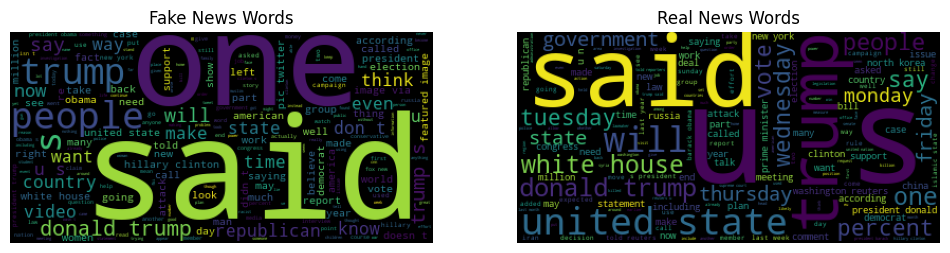

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordclouds
fake = " ".join(df[df['label'] == 1]['clean_content'])
real = " ".join(df[df['label'] == 0]['clean_content'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud().generate(fake))
plt.title("Fake News Words")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud().generate(real))
plt.title("Real News Words")
plt.axis('off')

plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

model = LinearSVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_val_tfidf)
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


✅ Accuracy: 0.9968819599109131
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [22]:
import joblib

In [23]:
joblib.dump(model, '../models/logistic_model.pkl')
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')
# The machine learning models are saved in pickle files which stores python objects in
# in binary format allowing to save and load them later


['../models/tfidf_vectorizer.pkl']

In [27]:
# Save them as CSV files
train_df.to_csv('../data/processed/train.csv', index=False)
val_df.to_csv('../data/processed/val.csv', index=False)

print("✅ Training and validation sets saved successfully.")


✅ Training and validation sets saved successfully.


In [28]:
train_df = pd.DataFrame({'clean_content': X_train, 'label': y_train})
val_df = pd.DataFrame({'clean_content': X_val, 'label': y_val})

In [29]:
train_df.to_csv('../data/processed/train.csv', index=False)
val_df.to_csv('../data/processed/val.csv', index=False)
